In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('sales_data_sample.csv',encoding='latin1')

In [5]:
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
data=data.dropna(axis=1,how='any')

In [7]:
data.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [8]:
data=data.copy()

Revenue Gap Analysis


In [9]:
# 1.Benchmarks based on average sales per product line

Benchmark_revenue=data.groupby('PRODUCTLINE')['SALES'].mean()

In [10]:
Benchmark_revenue

PRODUCTLINE
Classic Cars        4053.377104
Motorcycles         3523.831843
Planes              3186.286176
Ships               3053.150128
Trains              2938.226883
Trucks and Buses    3746.810100
Vintage Cars        3135.339110
Name: SALES, dtype: float64

In [11]:
# Add Benchmark and Calculate Gap:

data['Gap'] = data['SALES'] - data['PRODUCTLINE'].map(Benchmark_revenue)

In [12]:
data[['PRODUCTLINE','SALES','Gap']]

,PRODUCTLINE,SALES,Gap
0,Motorcycles,2871.00,-652.831843
1,Motorcycles,2765.90,-757.931843
2,Motorcycles,3884.34,360.508157
3,Motorcycles,3746.70,222.868157
4,Motorcycles,5205.27,1681.438157
...,...,...,...
2818,Ships,2244.40,-808.750128
2819,Ships,3978.51,925.359872
2820,Ships,5417.57,2364.419872
2821,Ships,2116.16,-936.990128


In [13]:
# 2.Revenue by Product Line

revenue_by_product = data.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
revenue_by_product

PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64

In [14]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

In [15]:
data['Year'] = data['ORDERDATE'].dt.year
data['Month'] = data['ORDERDATE'].dt.month

In [16]:
# Monthly Revenue

monthly_revenue = data.groupby(['Year', 'Month'])['SALES'].sum().reset_index()

In [17]:
monthly_revenue.head()

,Year,Month,SALES
0,2003,1,129753.60
1,2003,2,140836.19
2,2003,3,174504.90
3,2003,4,201609.55
4,2003,5,192673.11


In [18]:
# 3.Find revenue gaps by product line

actual_revenue = data.groupby('PRODUCTLINE')['SALES'].sum()
actual_revenue

PRODUCTLINE
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64

In [19]:
# Combine both Series into a DataFrame to ensure alignment
comparison_df = pd.DataFrame({
    'Actual Revenue': actual_revenue,
    'Benchmark Revenue': Benchmark_revenue
})

# Calculate the revenue gap directly
comparison_df['Revenue Gap'] = comparison_df['Actual Revenue'] - comparison_df['Benchmark Revenue']

# Print the result
print(comparison_df)

                  Actual Revenue  Benchmark Revenue   Revenue Gap
PRODUCTLINE                                                      
Classic Cars          3919615.66        4053.377104  3.915562e+06
Motorcycles           1166388.34        3523.831843  1.162865e+06
Planes                 975003.57        3186.286176  9.718173e+05
Ships                  714437.13        3053.150128  7.113840e+05
Trains                 226243.47        2938.226883  2.233052e+05
Trucks and Buses      1127789.84        3746.810100  1.124043e+06
Vintage Cars          1903150.84        3135.339110  1.900016e+06


In [20]:
# 4.Quantify Lost Revenue

# Check if there is any revenue loss
lost_revenue = comparison_df['Revenue Gap'][comparison_df['Revenue Gap'] < 0]

if lost_revenue.empty:
    print("No revenue loss detected. Actual revenue exceeds or matches the benchmark revenue for all product lines.")
else:
    total_lost_revenue = abs(lost_revenue.sum())
    print(f"Total lost revenue: {total_lost_revenue}")


No revenue loss detected. Actual revenue exceeds or matches the benchmark revenue for all product lines.


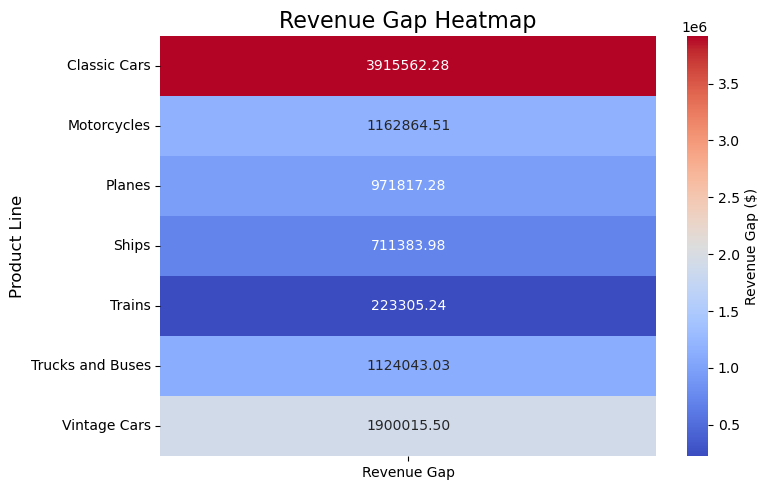

In [22]:
# 5.Visualize Revenue Gap

import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for the heatmap and plot
heatmap_data = comparison_df.pivot_table(index='PRODUCTLINE', values='Revenue Gap')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Revenue Gap ($)'})
plt.title('Revenue Gap Heatmap', fontsize=16)
plt.ylabel('Product Line', fontsize=12)
plt.tight_layout()
plt.show()
